<br>
<br>

# Unsupervised dimensionality reduction via principal component analysis

## Extracting the principal components step-by-step

In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [2]:
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Standardizing the data

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Eigendecomposition of the correlation matrix.

In [4]:
cormat = pd.DataFrame(X_train).corr()

eigen_vals, eigen_vecs = np.linalg.eig(cormat)

#print("condition number", np.sqrt(np.max(evals) / np.min(evals)))

print(eigen_vals)


[4.80369092 2.39654052 1.53597068 0.95345273 0.83487402 0.65672418
 0.51410501 0.34370938 0.3106115  0.10667911 0.21184979 0.15238941
 0.17940275]


## Total and explained variance

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

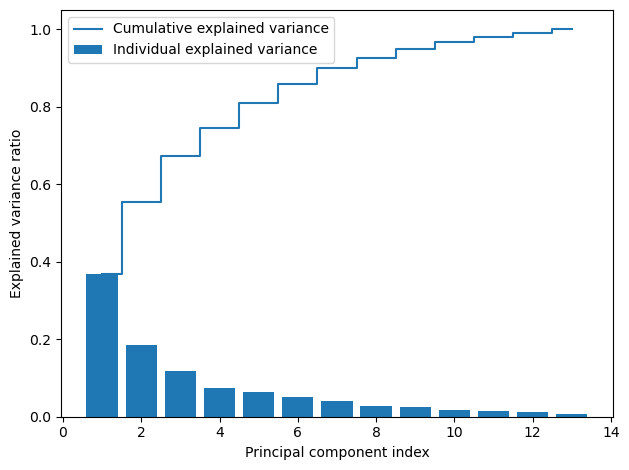

In [6]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<br>
<br>

## Feature transformation

In [7]:
pc_features = np.dot(X_train_std, eigen_vecs)


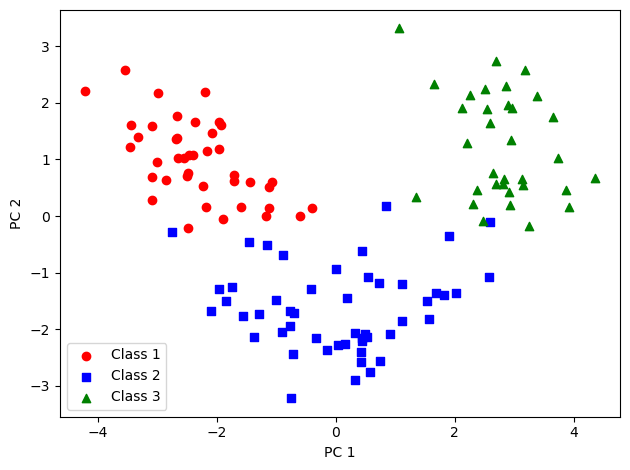

In [8]:
X_train_pca = pc_features[:, :2]
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_03.png', dpi=300)
plt.show()

#### Logistic regression on the PCA features

We get perfect score with just 8 components, and 98% with only 6 components.

In [9]:
X_train_pca = pc_features
X_test_pca = np.dot(X_test_std, eigen_vecs)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='liblinear')
lr = LogisticRegression()
for i in range(1, 14):
    X_train_pca = pc_features[:, :i]
    lr.fit(X_train_pca, y_train)
    score = lr.score(X_test_pca[:, :i], y_test)
    print(f"score for {i} components: {score}")

score for 1 components: 0.8703703703703703
score for 2 components: 0.9259259259259259
score for 3 components: 0.9259259259259259
score for 4 components: 0.9259259259259259
score for 5 components: 0.9444444444444444
score for 6 components: 0.9814814814814815
score for 7 components: 0.9814814814814815
score for 8 components: 1.0
score for 9 components: 1.0
score for 10 components: 1.0
score for 11 components: 1.0
score for 12 components: 1.0
score for 13 components: 1.0


<br>
<br>

## Principal component analysis in scikit-learn

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

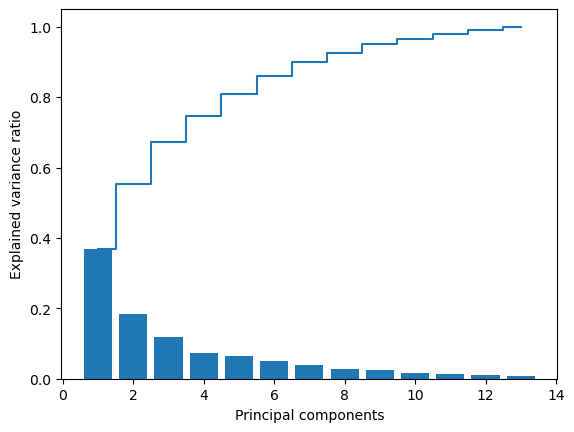

In [12]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

### Logistic regression on the PCA features revisited

Confirm the same results as above.

In [13]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)



0.9259259259259259

Compare original data

In [14]:
lr = lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

1.0

In [15]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## Assessing feature contributions

Compare for different components

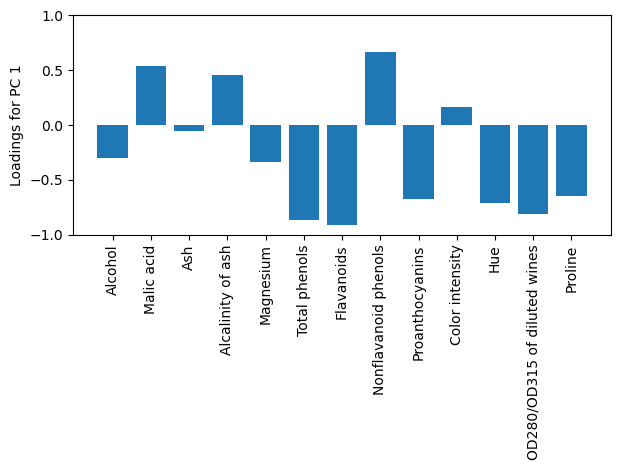

In [16]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [17]:
loadings[:, 0]

array([-0.30079812,  0.54189107, -0.05578308,  0.45356825, -0.33832857,
       -0.86303742, -0.91472185,  0.67007607, -0.6721681 ,  0.16556491,
       -0.71479545, -0.80789497, -0.65027936])

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [19]:
X = sc.fit_transform(cancer.data)
y = cancer.target



In [20]:
import umap

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA   
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


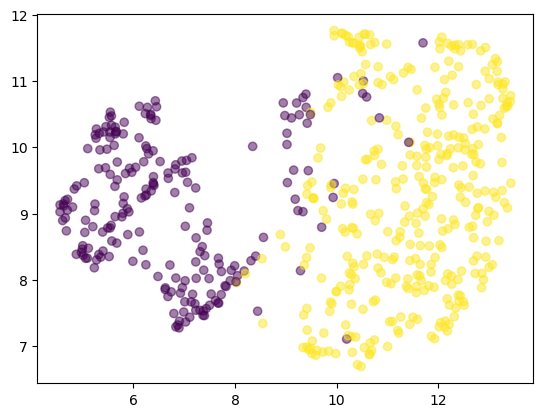

In [21]:
#X = pca.fit_transform(X)

reducer = umap.UMAP()
X = reducer.fit_transform(X)

plt.scatter(X[:,0], X[:, 1], c=y, marker='o', alpha=0.5)

In [22]:

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

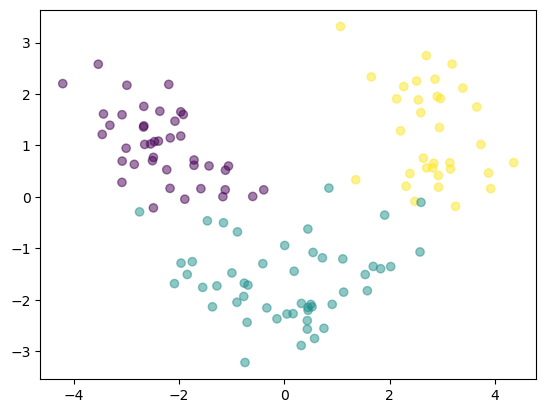

In [23]:
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c=y_train, marker='o', alpha=0.5)

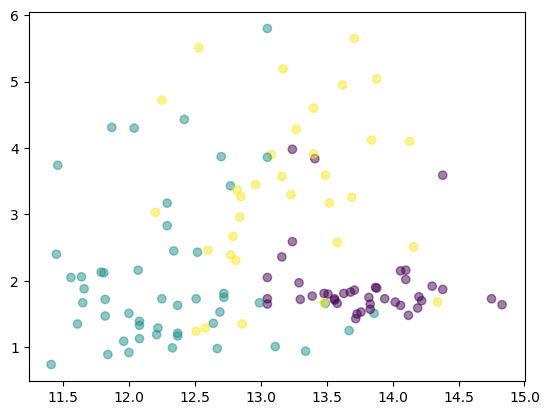

In [24]:
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, marker='o', alpha=0.5)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X[:,0:2],y)
rf.score(X[:,0:2],y)

1.0

In [26]:


from sklearn.datasets import make_swiss_roll

sr_points, sr_color = make_swiss_roll(n_samples=1500, random_state=0)

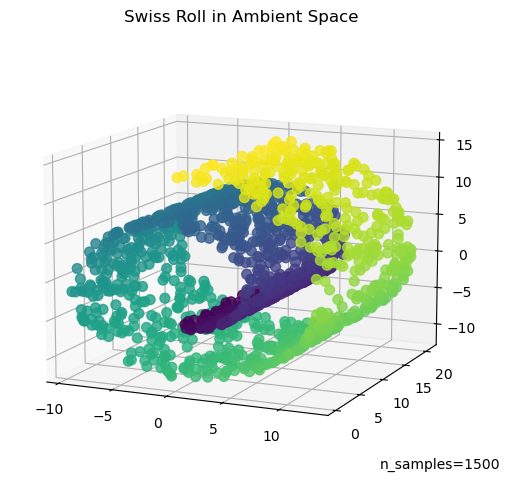

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [28]:
sr_points.shape

(1500, 3)

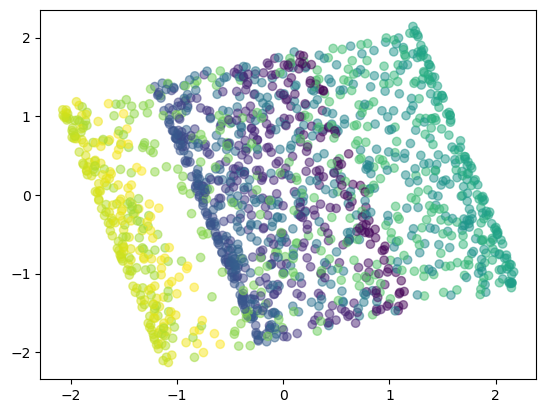

In [29]:
tsne = TSNE(n_components=2)

Xtsne =pca.fit_transform(sc.fit_transform(sr_points))

plt.scatter(Xtsne[:,0], Xtsne[:, 1], c=sr_color, marker='o', alpha=0.5)

In [32]:
db = DBSCAN(eps=0.5, min_samples=5)

db.fit(Xtsne)

DBSCAN()

In [56]:
from sklearn.datasets import load_digits

mnist = load_digits()

Xmnist = sc.fit_transform(mnist['data'])
ymnist = mnist['target']

In [58]:
Xmnist.shape

(1797, 64)

In [59]:
km = KMeans(n_clusters=10)
clust_km = km.fit_predict(Xmnist)
clust_db = db.fit_predict(Xmnist)

In [38]:
clust_km

array([0, 4, 4, ..., 4, 2, 2], dtype=int32)

In [61]:
tsne  = TSNE(n_components = 2)
pca = PCA(n_components = 2)
umapr = umap.UMAP(n_components = 2)

Xtsne = tsne.fit_transform(Xmnist)
Xpca = pca.fit_transform(Xmnist)
Xumap = umapr.fit_transform(Xmnist)

/Users/marciero/anaconda3/envs/ML_01/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/marciero/anaconda3/envs/ML_01/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'UMAP')

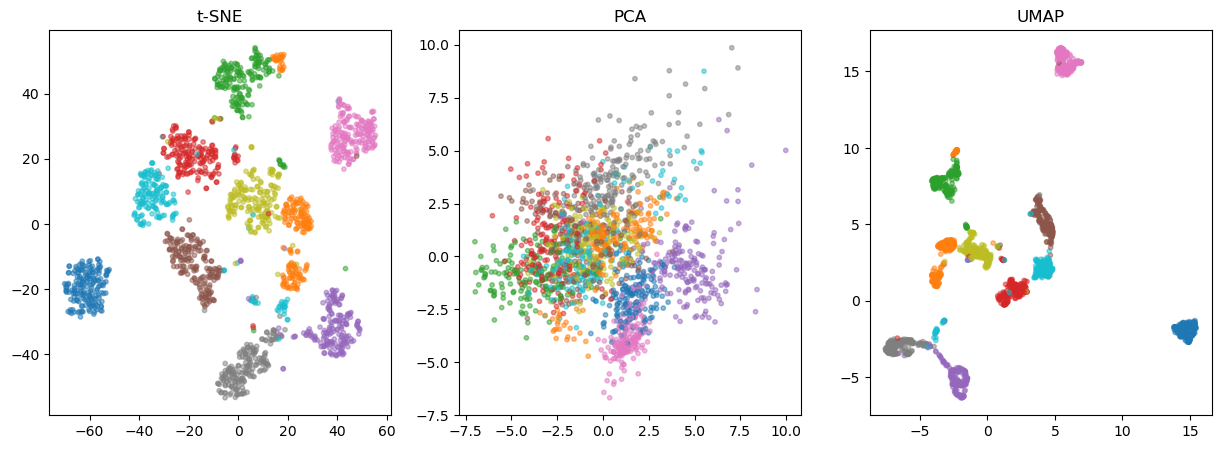

In [63]:
fig, axes =  plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(Xtsne[:,0], Xtsne[:,1], c = ymnist.astype(int), cmap='tab10', s=10, alpha=0.5)
axes[0].set_title('t-SNE')
axes[1].scatter(Xpca[:,0], Xpca[:,1], c = ymnist.astype(int), cmap='tab10', s=10, alpha=0.5)
axes[1].set_title('PCA')
axes[2].scatter(Xumap[:,0], Xumap[:,1], c = ymnist.astype(int), cmap='tab10', s=10, alpha=0.5)
axes[2].set_title('UMAP')

In [64]:
km = KMeans(n_clusters=10)
clust_km = km.fit_predict(Xmnist)

from sklearn.metrics import rand_score
rand_score(ymnist, clust_km)

0.9143784555551011

In [66]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(n_samples=1000, noise=0.05, random_state=0)

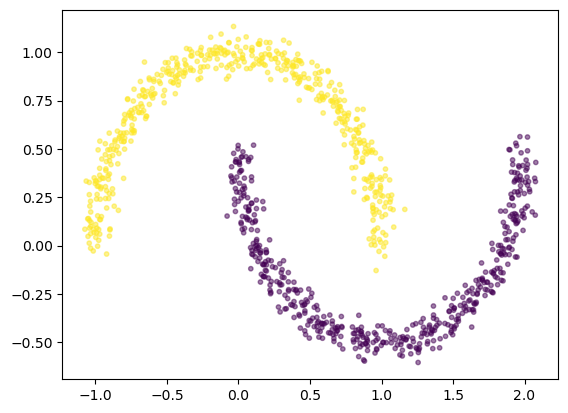

In [70]:
clust_km = km.fit_predict(Xmoon)

db = DBSCAN(eps=0.2, min_samples=5)
clust_db = db.fit_predict(Xmoon)

plt.scatter(Xmoon[:,0], Xmoon[:,1], c=clust_db, cmap='viridis', s=10, alpha=0.5)